# Titanic Dataset


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In the kaggle titanic dataset they have given two csv files train.csv which contains the labels and test.csv which does not contain labels, so i will do all the analysis on the train.csv and then apply it to test.csv and put the result on kaggle to see the score.

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic_df.shape

(891, 12)

since PassengerId and Name are not required for model building so i am removing these columns

In [4]:
titanic_df.drop(['PassengerId','Name'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## EDTA (Exploratory data analysis)

now finding if there are any missing values in the dataset

In [71]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

out of 891 sample 687 samples have missing values for Cabin, so it better to remove the column Cabin

In [5]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [73]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

now getting the list of numerical and categorical columns

In [6]:
numerical_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = titanic_df.select_dtypes(include=['object']).columns.tolist()

In [7]:
print(numerical_cols)
print(categorical_cols)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Ticket', 'Embarked']


now creating some graphs 

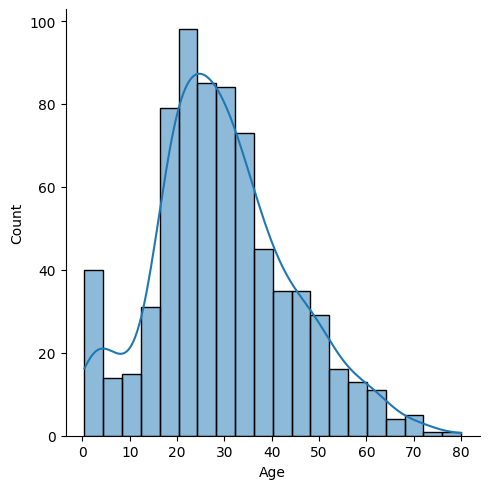

In [17]:
sns.displot(titanic_df['Age'], kde=True)

the graph of age is somewhat uniform with maximum people within the age group of 20 to 40

<Axes: xlabel='Age', ylabel='Count'>

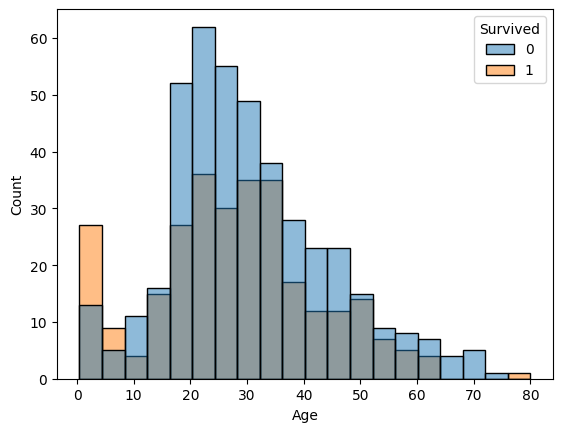

In [19]:
sns.histplot(data=titanic_df, x='Age', hue='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

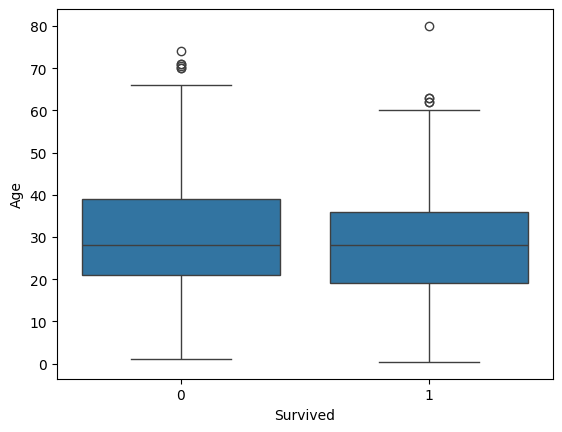

In [20]:
sns.boxplot(data=titanic_df, x='Survived', y='Age')

<Axes: xlabel='Age'>

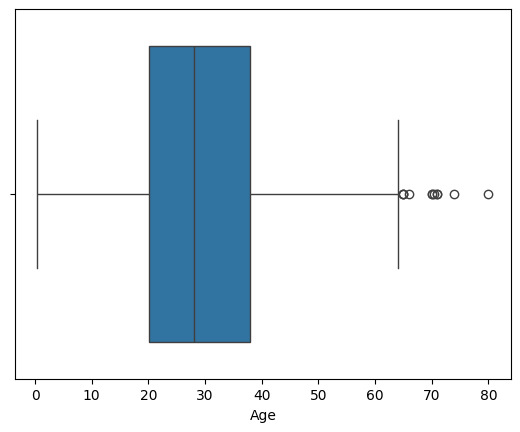

In [22]:
sns.boxplot(data=titanic_df, x='Age')

from the graphs of age the observations which i infer are:
1) There are some outliers in the age column and some missing values
2) The age follows uniform distribution with maximum people within age group of 20 to 40
3) and there is no clear relationship between age and survived

In [28]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

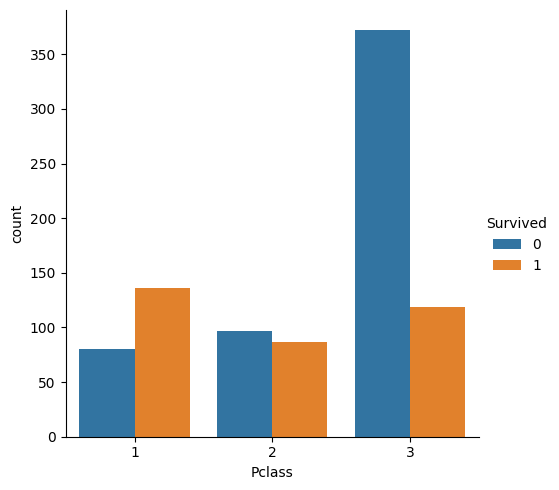

In [38]:
sns.catplot(data=titanic_df, x='Pclass', hue='Survived', kind='count')

from the graphs of Pclass i infer that:
1) There are three clases 1,2,3
2) Classes 1 and 2 have more chances of survival

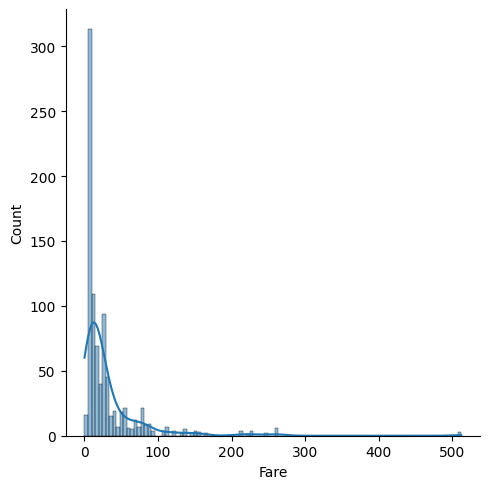

In [39]:
sns.displot(titanic_df['Fare'], kde=True)

In [40]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Survived'>

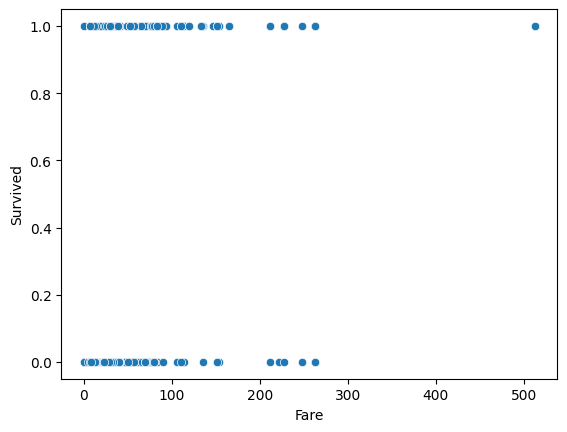

In [41]:
sns.scatterplot(data=titanic_df, x='Fare', y='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

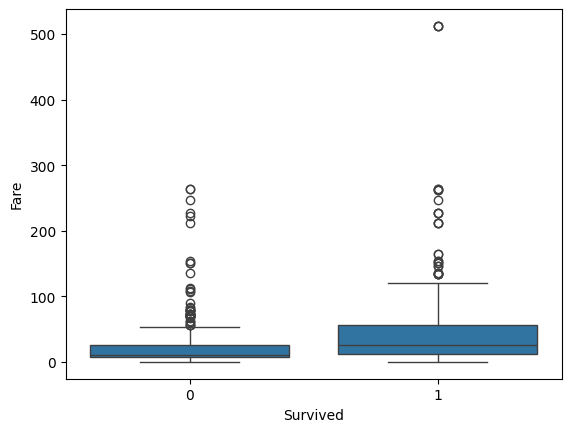

In [42]:
sns.boxplot(data=titanic_df, x='Survived', y='Fare')

<Axes: xlabel='Fare'>

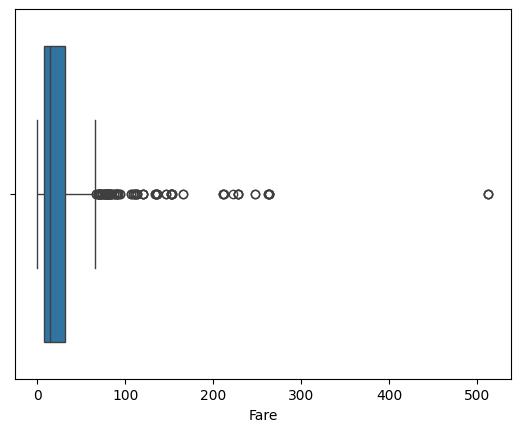

In [43]:
sns.boxplot(data=titanic_df, x='Fare')

from the graphs of fare i infer that:
1)  the distribution of fare is not uniform with mean value is somewhat 32.20 and have a long tail with some samples having fare greater than 300 and more.
2) it have no clear relationship with survived column.
3) it has outliers

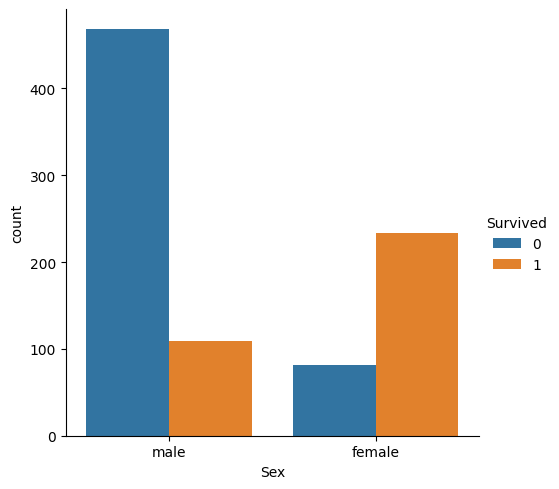

In [46]:
sns.catplot(data=titanic_df, x='Sex', hue='Survived', kind='count')

In [47]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

from the graphs of sex i infer that:
1) there are two categories male and female
2) female have more chances of survival than of man

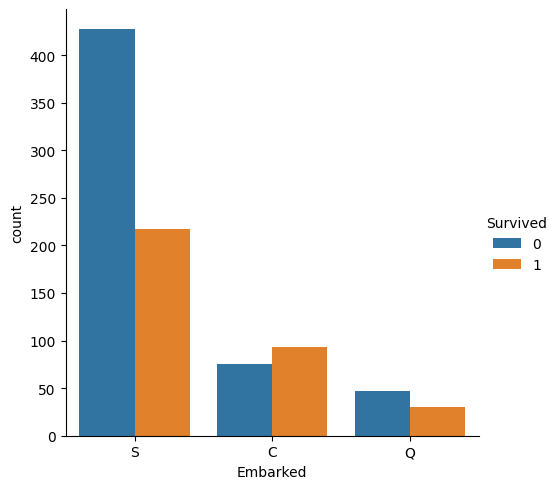

In [48]:
sns.catplot(data=titanic_df, x='Embarked', hue='Survived', kind='count')

In [49]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

for the embarked column i infer that:
1) There are three values in the dataset for embarked column which are C = Cherbourg, Q = Queenstown, S = Southampton
2) as such there are no relationship betweenm embarked and survived but from the graph i can see that all people embarked from cherbourg have been survived and from the people embarked from Queenstown maximum of them have been survived

now finding how many outliers are there in age feature

In [7]:
titanic_df.shape

(891, 9)

In [8]:
q1 = titanic_df['Age'].quantile(0.25)
q3 = titanic_df['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
titanic_df[(titanic_df['Age'] < lower_bound) | (titanic_df['Age'] > upper_bound)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,0,2,male,66.0,0,0,C.A. 24579,10.5000,S
54,0,1,male,65.0,0,1,113509,61.9792,C
96,0,1,male,71.0,0,0,PC 17754,34.6542,C
116,0,3,male,70.5,0,0,370369,7.7500,Q
280,0,3,male,65.0,0,0,336439,7.7500,Q
456,0,1,male,65.0,0,0,13509,26.5500,S
493,0,1,male,71.0,0,0,PC 17609,49.5042,C
630,1,1,male,80.0,0,0,27042,30.0000,S
672,0,2,male,70.0,0,0,C.A. 24580,10.5000,S
745,0,1,male,70.0,1,1,WE/P 5735,71.0000,S


so there are 11 outliers in the age feature and i am removing the outliers

In [9]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic_df['Age'] = impute.fit_transform(titanic_df[['Age']])

In [10]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [10]:
titanic_df = titanic_df[(titanic_df['Age'] > lower_bound) & (titanic_df['Age'] < upper_bound)]
titanic_df.shape

(880, 9)

## Model Training


In [11]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [12]:
titanic_df.drop(['Ticket'], axis=1, inplace=True)

In [83]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


first spliting the data into training and test set

In [84]:
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Now creating two column transformers one for numerical columns and one for categorical columns. 

* Numerical column transformer will standardize the numerical columns. 
* Categorical column will apply imputation on embarked and then onehotencoding on sex and embarked

after that putting both the transformers in a pipeline along with logistic regression model.

In [86]:
numerical_cols = numerical_cols[1:]


In [87]:
print(numerical_cols)
print(categorical_cols)

['Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Ticket', 'Embarked']


In [88]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
295,1,male,29.699118,0,0,27.7208,C
694,1,male,60.000000,0,0,26.5500,S
554,3,female,22.000000,0,0,7.7750,S
845,3,male,42.000000,0,0,7.5500,S
808,2,male,39.000000,0,0,13.0000,S


In [ ]:
# numerical_trans = Pipeline([
#     ('scale',StandardScaler())
# ])

In [89]:
categorical_trans = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

In [90]:
preprocessor_trans = ColumnTransformer([
    # ('num_trans', numerical_trans,[0,2,3,4,5]),
    ('cat_trans', categorical_trans,[1,6]),
],remainder='passthrough')

In [91]:
pipe = Pipeline([
    ('preprocessor', preprocessor_trans),
    ('logistic', LogisticRegression())
])

In [92]:
pipe.fit(X_train, y_train)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  [1, 6])])),
                ('logistic', LogisticRegression())])

In [93]:
y_pred = pipe.predict(X_test)
x_pred = pipe.predict(X_train)

In [94]:
print('training accuracy: ', accuracy_score(y_train, x_pred))
print('test accuracy: ', accuracy_score(y_test, y_pred))

training accuracy:  0.7997159090909091
test accuracy:  0.8068181818181818


Making a copy of the dataframe and making a new FamilySize which has value SibSp + Parch + 1 and making training the model again for checking train and test accuracy

In [95]:
new_titanic_df = titanic_df.copy()

In [96]:
new_titanic_df['FamilySize'] = new_titanic_df['SibSp'] + new_titanic_df['Parch'] + 1

In [97]:
new_titanic_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [98]:
new_titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [99]:
new_titanic_df.shape

(880, 7)

In [100]:
y = new_titanic_df['Survived']
X = new_titanic_df.drop(['Survived'], axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
295,1,male,29.699118,27.7208,C,1
694,1,male,60.000000,26.5500,S,1
554,3,female,22.000000,7.7750,S,1
845,3,male,42.000000,7.5500,S,1
808,2,male,39.000000,13.0000,S,1


In [103]:
categorical_trans = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

In [104]:
preprocessor_trans = ColumnTransformer([
    # ('num_trans', numerical_trans,[0,2,3,4,5]),
    ('cat_trans', categorical_trans,[1,4]),
],remainder='passthrough')

In [105]:
pipe = Pipeline([
    ('preprocessor', preprocessor_trans),
    ('logistic', LogisticRegression())
])

In [141]:
pipe.fit(X_train, y_train)

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  [1, 4])])),
                ('logistic', LogisticRegression())])

In [143]:
x_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

In [144]:
print('training accuracy: ', accuracy_score(y_train, x_pred))
print('test accuracy: ', accuracy_score(y_test, y_pred))

training accuracy:  0.8011363636363636
test accuracy:  0.8238636363636364


the accuracy increases by adding the column FamilySize

In [81]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
295,1,male,29.699118,27.7208,C,1
694,1,male,60.000000,26.5500,S,1
554,3,female,22.000000,7.7750,S,1
845,3,male,42.000000,7.5500,S,1
808,2,male,39.000000,13.0000,S,1


In [117]:
pipe[1].n_features_in_

9

In [125]:
test_df = pd.read_csv('test.csv')

In [126]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
test_df.shape

(418, 11)

In [128]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [129]:
test_df.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [130]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,2
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,3


In [147]:
test_df['Age'] = impute.fit_transform(test_df[['Age']])

In [152]:
impute2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_df['Fare'] = impute2.fit_transform(test_df[['Fare']])

In [154]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [155]:
y_test_pred = pipe.predict(test_df)

In [156]:
test_df

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,34.50000,7.8292,Q,1
1,3,female,47.00000,7.0000,S,2
2,2,male,62.00000,9.6875,Q,1
3,3,male,27.00000,8.6625,S,1
4,3,female,22.00000,12.2875,S,3
...,...,...,...,...,...,...
413,3,male,30.27259,8.0500,S,1
414,1,female,39.00000,108.9000,C,1
415,3,male,38.50000,7.2500,S,1
416,3,male,30.27259,8.0500,S,1


In [157]:
test_df2 = pd.read_csv('test.csv')

In [161]:
passenger_ids = test_df2['PassengerId'].tolist()

In [162]:
print(passenger_ids)

[892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 107

In [163]:
result_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_test_pred})

In [164]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [165]:
result_df.to_csv('submission.csv', index=False)

On kaggle the score for above submission is 0.767.